# Initation
Reading all result files, replace the results_dir with the relevant path.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ersätt denna path.
results_dir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/11. Results"

# Read ids and results and pick out which items are from combined policy and which are from "regular" one.
item_ids = pd.read_csv(f"{results_dir}/csv_files/item_ids.csv")["Item id"].to_numpy()
results_df = pd.read_csv(f"{results_dir}/csv_files/results.csv")
ids_combined = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_Combined_IP","Item id"].to_numpy()
ids_regular = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_IP","Item id"].to_numpy()

results_df.set_index("Item id", drop = False, inplace = True)

df_dict = {}

for id in item_ids:
    df = pd.read_csv(f"{results_dir}/csv_files/{id}_results.csv")
    df.set_index("Installation name", inplace = True)
    df_dict[id] = df
    



# Graph init

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.ticker as mtick

graph_dir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/11. Results/graphs"

all_dealers = ["Bartlett","Bloemfontein","Capetown","Durban","George",
"Kimberley","Middelburg","Nelspruit","Port Elizabeth",
"Richards Bay","Rustenburg","Steelpoort","Wolmaransstad"]
dealer_dict = {"Bartlett" : "A","Bloemfontein": "B","Capetown": "C","Durban": "D","George": "E",
"Kimberley": "F","Middelburg": "H","Nelspruit": "I","Port Elizabeth": "J",
"Richards Bay" : "K","Rustenburg": "L","Steelpoort": "M","Wolmaransstad": "N"}

color_dict_stock = {"SE_model_RDC": "#C96238", "SE_model_Deal": "#FC9003"}
color_dict = {"BM_model": '#2D3B60', "SE_model": '#7488BD', "BM_simulation": '#577C24', "SE_simulation": '#CBE5A6', "Target": 'gray'}
linestyle_dict = {"BM_model": 'solid', "SE_model": 'dashed', "BM_simulation": 'dotted', "SE_simulation": 'dashdot', "Target": 'solid'}
marker_dict = {"BM_model": 'o', "SE_model": '^', "BM_simulation": 's', "SE_simulation": 'D', "Target": '.'}


In [15]:
len(ids_combined)

24

# Reorder points
- Warehouse reorder points
- Reorder points at specific dealer
- Mean reorder point at dealers

## Warehouse reorder points

R warehouse combined policy per item.


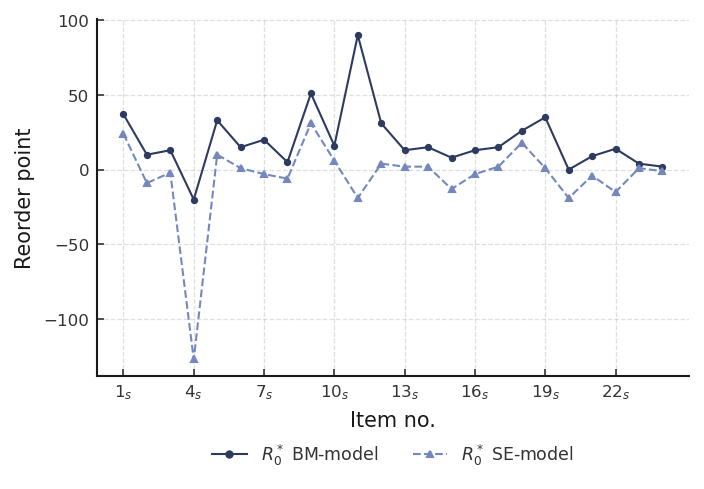

In [55]:
# Warehouse reorder points combined items
df = pd.DataFrame({"Item id": ids_combined,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
x = [f'${no+1}_s$' for no in x]
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_R_BM, label = "$R^*_0$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*_0$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])

ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Reorder point")
ax.set_xlabel("Item no.")
ax.set_xticks([0,3,6,9,12,15,18,21])

print("R warehouse combined policy per item.")
plt.savefig(f"{graph_dir}/01_RDC_R_per_item_combined.png",bbox_inches = 'tight')
#plt.savefig('test.png')
plt.show()

R warehouse, regular policy, per item.


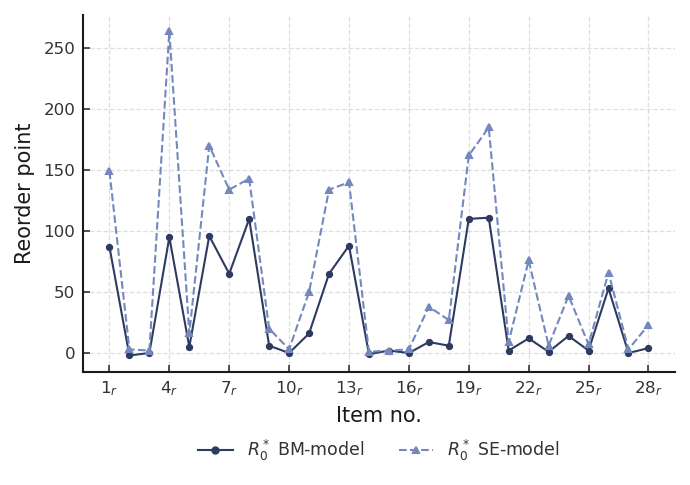

In [77]:
df = pd.DataFrame({"Item id": ids_regular,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_R_BM, label = "$R^*_0$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*_0$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)

ax.set_ylabel("Reorder point")
ax.set_xlabel("Item no.")

print("R warehouse, regular policy, per item.")
plt.savefig(f"{graph_dir}/02_warehouse_R_per_item_regular.png",bbox_inches = 'tight')
plt.show()

## Mean reorder point at dealers

### Combined policy


#### Overall

Dealer R mean combined policy per item.


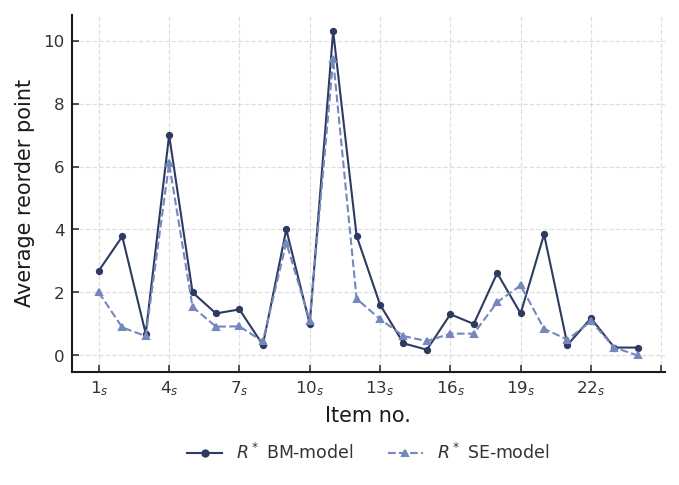

In [54]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Item": ids_combined, "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Item", inplace = True, drop = False)
x_list = []

for item_id in ids_combined:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for dealer in dealer_list:
        try:
            R_BM_sum += int(df_dict[item_id].loc[dealer,"R, BM model"])
            R_SE_sum += int(df_dict[item_id].loc[dealer,"R, SE model"])
            R_count += 1
        except KeyError:
            pass
            
    if R_count > 0:
        df.loc[item_id,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[item_id,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[item_id,"R_mean_BM"] = np.nan
        df.loc[item_id,"R_mean_SE"] = np.nan

df.reset_index(inplace = True, drop = True)
x = df.index.values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Average reorder point")
ax.set_xlabel("Item no.")


print(f"Dealer R mean combined policy per item.")
plt.savefig(f"{graph_dir}/03_dealer_mean_R_per_item_combined.png",bbox_inches = 'tight')
plt.show()

### Regular policy


Dealer R mean regular policy per item.


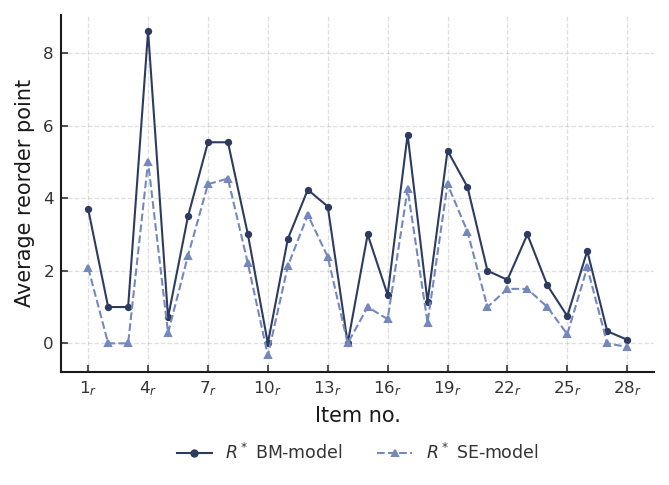

In [78]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Item": ids_regular, "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Item", inplace = True, drop = False)
x_list = []

for item_id in ids_regular:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for dealer in dealer_list:
        try:
            R_BM_sum += int(df_dict[item_id].loc[dealer,"R, BM model"])
            R_SE_sum += int(df_dict[item_id].loc[dealer,"R, SE model"])
            R_count += 1
        except KeyError:
            pass
            
    if R_count > 0:
        df.loc[item_id,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[item_id,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[item_id,"R_mean_BM"] = np.nan
        df.loc[item_id,"R_mean_SE"] = np.nan

df.reset_index(inplace = True, drop = True)
x = df.index.values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Average reorder point")
ax.set_xlabel("Item no.")

print(f"Dealer R mean regular policy per item.")
plt.savefig(f"{graph_dir}/04_dealer_mean_R_per_item_regular.png",bbox_inches = 'tight')
plt.show()

## Mean reorder point per demand type

Dealer R mean combined policy per demand type.


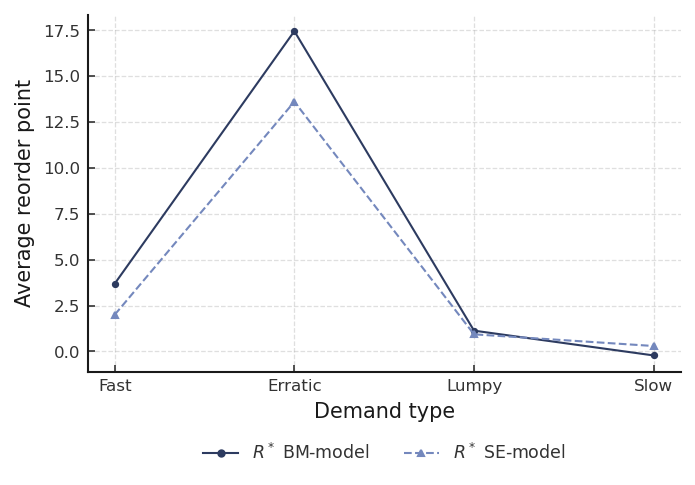

In [58]:
# Reorder point per demand type combined
dealer_list = all_dealers
demand_types = ['Fast','Erratic','Lumpy','Slow']
df = pd.DataFrame({"Demand type": demand_types, "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Demand type", inplace = True, drop = False)
x_list = []

for demand_type in demand_types:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for item_id in ids_combined:
        for dealer in dealer_list:
            try:
                R_BM_sum += int(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"R, BM model"])
                R_SE_sum += int(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"R, SE model"])
                R_count += 1
            except KeyError:
                pass
            
    if R_count > 0:
        df.loc[demand_type,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[demand_type,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[demand_type,"R_mean_BM"] = np.nan
        df.loc[demand_type,"R_mean_SE"] = np.nan

x = df.index.values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Average reorder point")
ax.set_xlabel("Demand type")

print(f"Dealer R mean combined policy per demand type.")
plt.savefig(f"{graph_dir}/05_dealer_mean_R_per_demand_type_combined.png",bbox_inches = 'tight')
plt.show()


Dealer R mean regular policy per demand type.


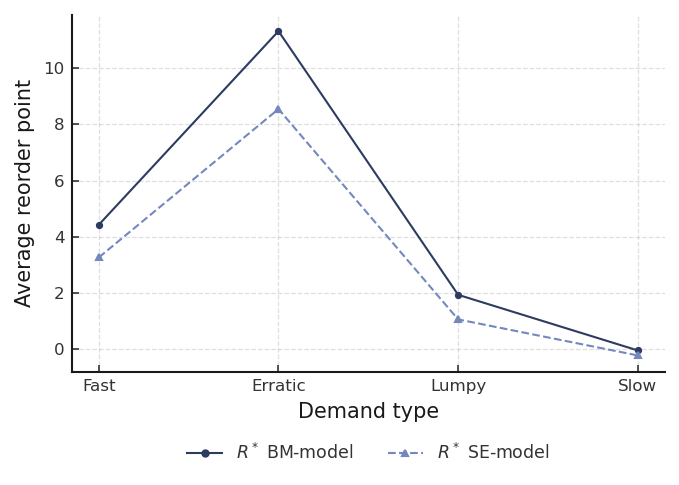

In [59]:
# Reorder point per demand type regular
dealer_list = all_dealers
demand_types = ['Fast','Erratic','Lumpy','Slow']
df = pd.DataFrame({"Demand type": demand_types, "R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Demand type", inplace = True, drop = False)
x_list = []

for demand_type in demand_types:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for item_id in ids_regular:
        for dealer in dealer_list:
            try:
                R_BM_sum += int(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"R, BM model"])
                R_SE_sum += int(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"R, SE model"])
                R_count += 1
            except KeyError:
                pass
            
    if R_count > 0:
        df.loc[demand_type,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[demand_type,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[demand_type,"R_mean_BM"] = np.nan
        df.loc[demand_type,"R_mean_SE"] = np.nan

x = df.index.values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Average reorder point")
ax.set_xlabel("Demand type")

print(f"Dealer R mean regular policy per demand type.")
plt.savefig(f"{graph_dir}/06_dealer_mean_R_per_demand_type_regular.png",bbox_inches = 'tight')
plt.show()


# Fill rates

## Fill rate warehouse 

- Absolute values
- Deviation


### Combined policy

IFR warehouse combined policy per item.


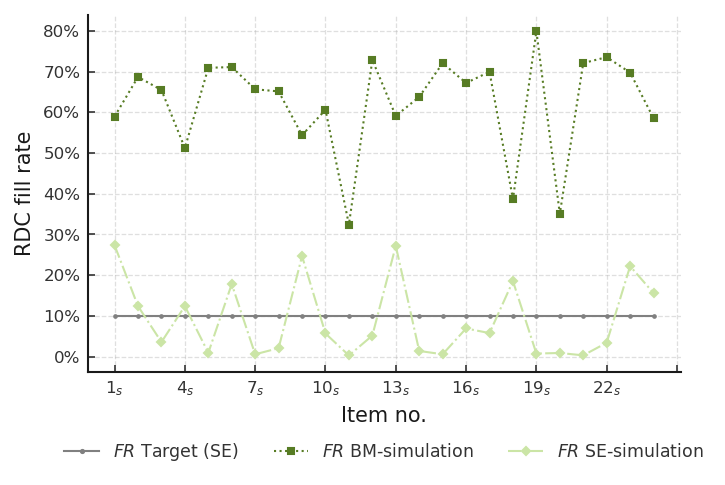

In [22]:
# Warehouse reorder points combined items, only simulation
df = pd.DataFrame({"Item id": ids_combined,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 4)
ax.set_ylabel("RDC fill rate")
ax.set_xlabel("Item no.")

print("IFR warehouse combined policy per item.")
plt.savefig(f"{graph_dir}/07_RDC_IFR_per_item_combined.png",bbox_inches = 'tight')
plt.show()

IFR warehouse combined policy per item with simulaiton.


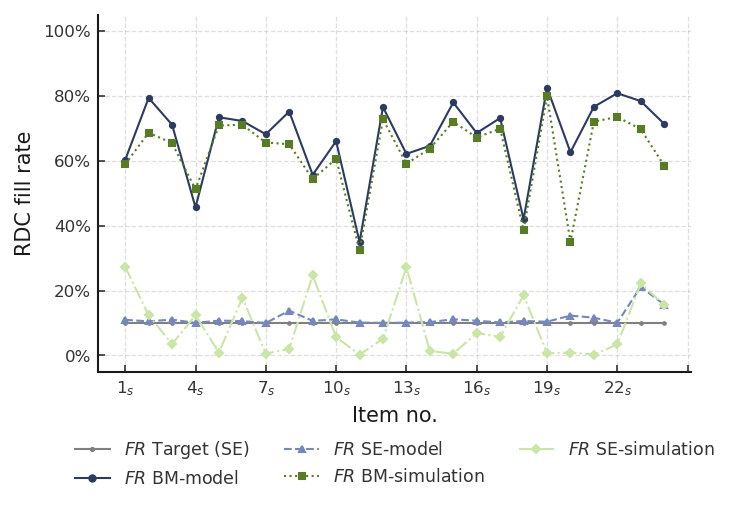

In [23]:
# Warehouse reorder points combined items
df = pd.DataFrame({"Item id": ids_combined,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("RDC fill rate")
ax.set_xlabel("Item no.")

print("IFR warehouse combined policy per item with simulaiton.")
plt.savefig(f"{graph_dir}/08_RDC_IFR_per_item_combined_with_sim.png",bbox_inches = 'tight')
plt.show()

IFR warehouse combined policy per item with simulaiton.


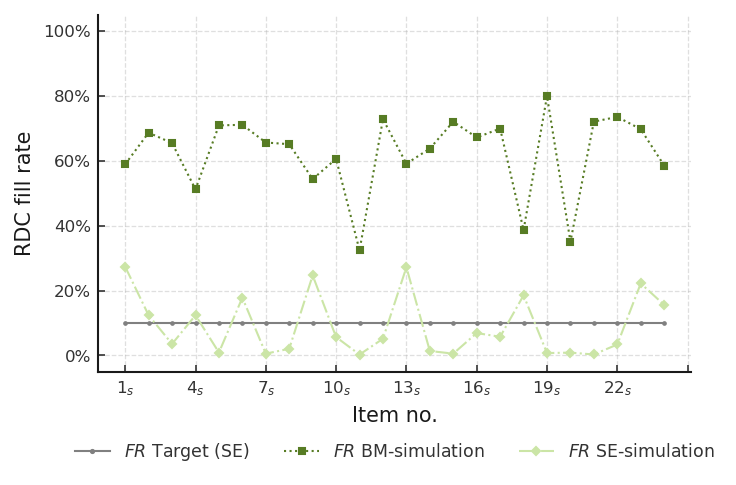

In [4]:
# Warehouse reorder points combined items
df = pd.DataFrame({"Item id": ids_combined,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 3)
ax.set_ylabel("RDC fill rate")
ax.set_xlabel("Item no.")

print("IFR warehouse combined policy per item with simulaiton.")
plt.savefig(f"{graph_dir}/To_presentation_RDC_IFR_per_item_combined_with_sim.png",bbox_inches = 'tight')
plt.show()

### Regular policy

IFR warehouse regular policy per item.


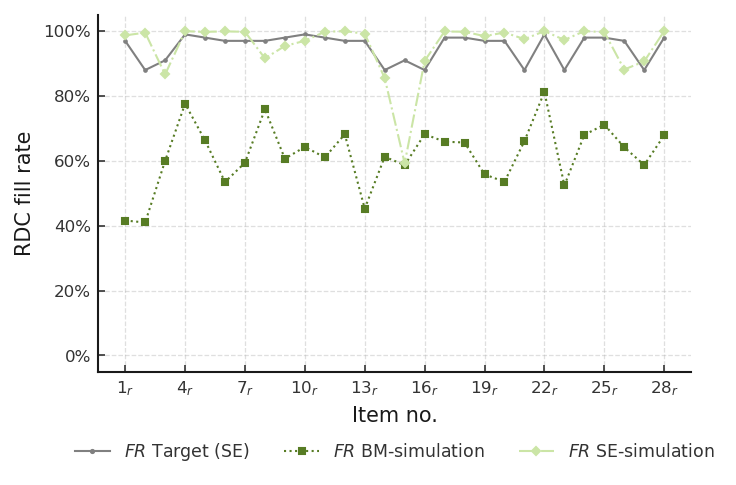

In [60]:
# Warehouse fillrates regular items,
df = pd.DataFrame({"Item id": ids_regular,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 3)
ax.set_ylabel("RDC fill rate")
ax.set_xlabel("Item no.")

print("IFR warehouse regular policy per item.")
plt.savefig(f"{graph_dir}/09_RDC_IFR_per_item_regular.png",bbox_inches = 'tight')
plt.show()

IFR warehouse regular policy per item.


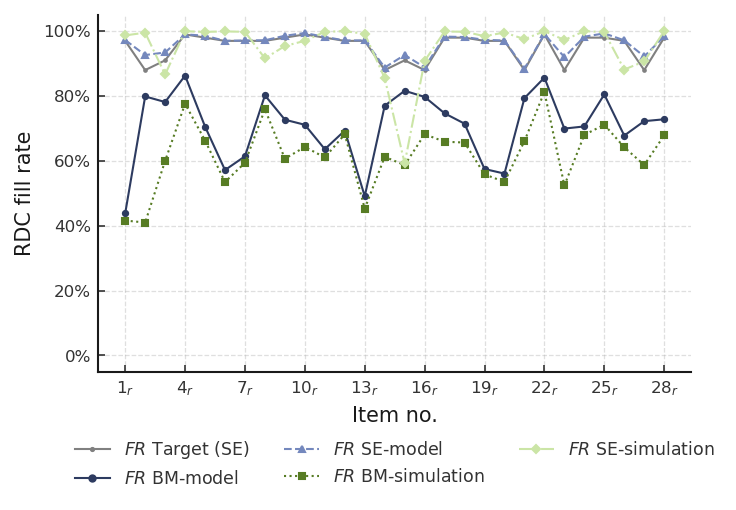

In [61]:
# Warehouse fill rates with wim regular items
df = pd.DataFrame({"Item id": ids_regular,"IFR_wh_BM": np.nan,"IFR_wh_SE": np.nan,
    "IFR_wh_BM_sim": np.nan, "IFR_wh_SE_sim": np.nan, "target_IFR": np.nan})
    
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"IFR_wh_BM"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM model"]
    df.loc[id,"IFR_wh_SE"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE model"]
    df.loc[id,"IFR_wh_BM_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    df.loc[id,"IFR_wh_SE_sim"] = df_dict[id].loc["Johannesburg","Fill rate estimate, SE simulation"]
    df.loc[id,"target_IFR"] = df_dict[id].loc["Johannesburg","Target fill rate"]

df.reset_index(inplace = True)

x = df.index.values

y_IFR_BM = df["IFR_wh_BM"].values
y_IFR_SE = df["IFR_wh_SE"].values
y_IFR_BM_sim = df["IFR_wh_BM_sim"].values
y_IFR_SE_sim = df["IFR_wh_SE_sim"].values
y_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("RDC fill rate")
ax.set_xlabel("Item no.")

print("IFR warehouse regular policy per item.")
plt.savefig(f"{graph_dir}/10_RDC_IFR_per_item_regular_with_sim.png",bbox_inches = 'tight')
plt.show()

## Mean fill rate at dealers per dealer





### Combined policy


Dealer IFR mean combined policy per dealer.


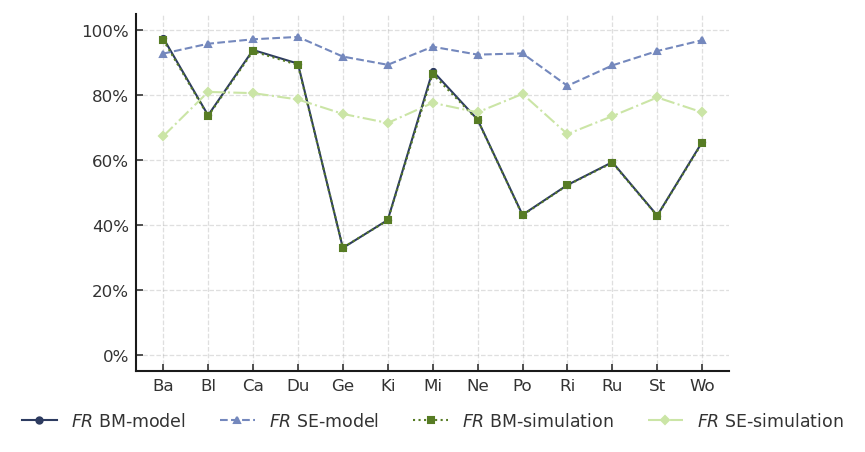

In [26]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list, "Dealer identifier": dealer_dict.values(), 
"IFR_mean_dealer_BM": np.nan,"IFR_mean_dealer_SE": np.nan, "IFR_mean_dealer_BM_sim": np.nan,
"IFR_mean_dealer_SE_sim": np.nan})

df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    IFR_BM_sum = 0
    IFR_SE_sum = 0
    IFR_BM_sim_sum = 0
    IFR_SE_sim_sum = 0
    IFR_count = 0

    for id in ids_combined:
        try:
            IFR_BM_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM model"])
            IFR_SE_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE model"])
            IFR_BM_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM simulation"])
            IFR_SE_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE simulation"])
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[dealer,"IFR_mean_dealer_BM"] = IFR_BM_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE"] = IFR_SE_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = IFR_BM_sim_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = IFR_SE_sim_sum/IFR_count
    else:
        df.loc[dealer,"IFR_mean_dealer_BM"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = np.nan

    x_list.append(dealer[:2])

x = x_list
y_mean_IFR_BM = df["IFR_mean_dealer_BM"].values
y_mean_IFR_SE = df["IFR_mean_dealer_SE"].values
y_mean_IFR_BM_sim = df["IFR_mean_dealer_BM_sim"].values
y_mean_IFR_SE_sim = df["IFR_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

#ax.plot(x, y_mean_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)
ax.legend(bbox_to_anchor=(0.5,-0.21),ncol = 4)

print(f"Dealer IFR mean combined policy per dealer.")
plt.savefig(f"{graph_dir}/11_dealer_mean_IFR_per_dealer_combined_absolute_scale.png",bbox_inches = 'tight')
plt.show()

Dealer IFR mean regular policy per dealer.


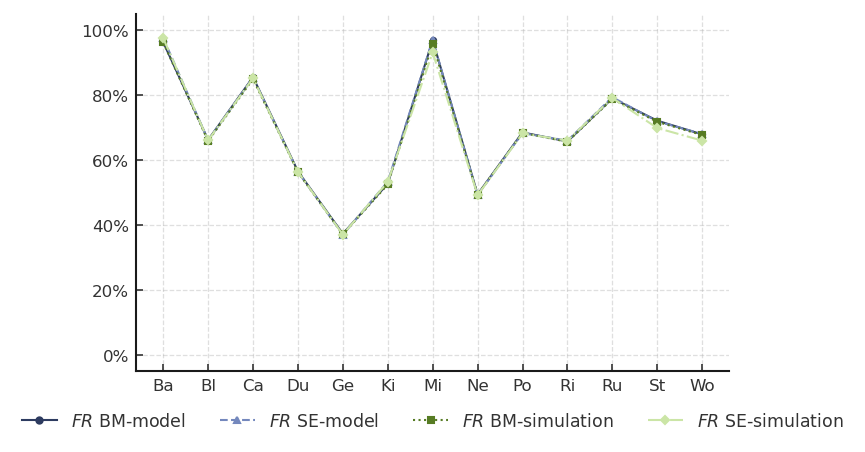

In [27]:
# Mean IFR per dealer for regular policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list,
"IFR_mean_dealer_BM": np.nan,"IFR_mean_dealer_SE": np.nan, "IFR_mean_dealer_BM_sim": np.nan,
"IFR_mean_dealer_SE_sim": np.nan})

df.set_index("Dealer", inplace = True)
x_list = []

for dealer in dealer_list:
    IFR_BM_sum = 0
    IFR_SE_sum = 0
    IFR_BM_sim_sum = 0
    IFR_SE_sim_sum = 0
    IFR_count = 0

    for id in ids_regular:
        try:
            IFR_BM_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM model"])
            IFR_SE_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE model"])
            IFR_BM_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, BM simulation"])
            IFR_SE_sim_sum += float(df_dict[id].loc[dealer,"Fill rate estimate, SE simulation"])
            
            IFR_count += 1
        except KeyError:
            pass
            #print(f"Error: {dealer}, {id}")
            
            
    if IFR_count > 0:
        df.loc[dealer,"IFR_mean_dealer_BM"] = IFR_BM_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE"] = IFR_SE_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = IFR_BM_sim_sum/IFR_count
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = IFR_SE_sim_sum/IFR_count
    else:
        df.loc[dealer,"IFR_mean_dealer_BM"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_BM_sim"] = np.nan
        df.loc[dealer,"IFR_mean_dealer_SE_sim"] = np.nan

    x_list.append(dealer[:2])

x = x_list
y_mean_IFR_BM = df["IFR_mean_dealer_BM"].values
y_mean_IFR_SE = df["IFR_mean_dealer_SE"].values
y_mean_IFR_BM_sim = df["IFR_mean_dealer_BM_sim"].values
y_mean_IFR_SE_sim = df["IFR_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

#ax.plot(x, y_mean_IFR_target, label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(-0.05,1.05)
ax.legend(bbox_to_anchor=(0.5,-0.21),ncol = 4)

print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/12_dealer_mean_IFR_per_dealer_combined_absolute_scale.png",bbox_inches = 'tight')
plt.show()

## Mean fill rate deviation per item
- deviation

### Combined policy

#### ALL combined

Dealer IFR mean combined policy per item.


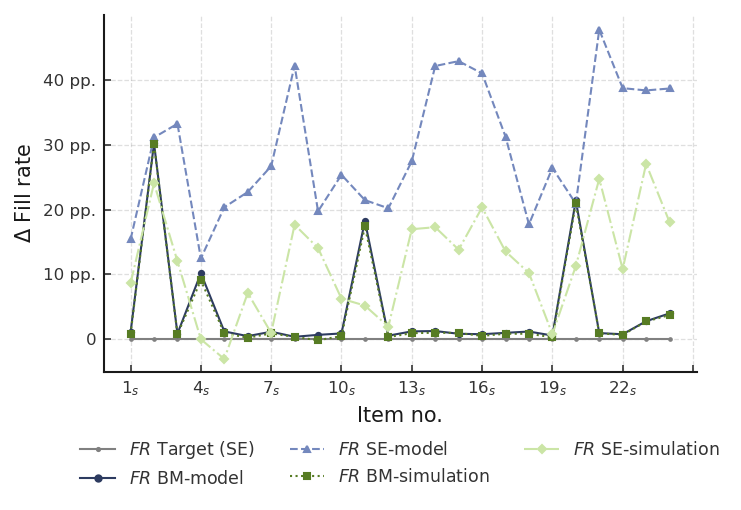

In [28]:
# Mean IFR deviation per item for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_combined, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_combined:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
            IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
            IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
            IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target
            
            #if item_id == "11708551":
            #    print(target,IFR_dev_BM_sum )

            IFR_count += 1
        except KeyError:
            #print(f"error: id {item_id}, dealer {dealer}")
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

yticks = [0,0.1,0.2,0.3,0.4]
yticklabs = ["0", "10 pp.", "20 pp.", "30 pp.", "40 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.05,0.5))
ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean combined policy per item.")
plt.savefig(f"{graph_dir}/13_dealer_mean_IFR_deviation_per_item_combined.png",bbox_inches = 'tight')
plt.show()

#### Stocked

Dealer IFR mean combined policy per item.


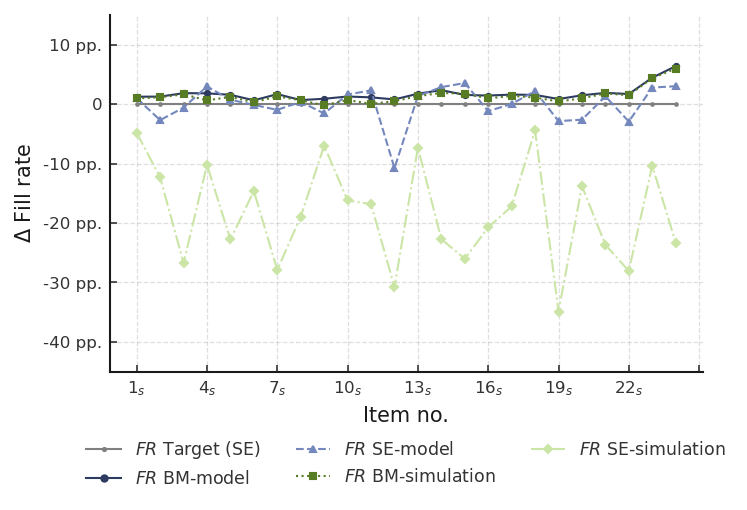

Average dealer SE undershoot: -0.18392884904117804
Average dealer BM undershoot: 0.013504415121877868


In [29]:
# Mean IFR deviation per item for combined policy stocked items.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_combined, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_combined:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            if target != 0:
                IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
                IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
                IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
                IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target

                IFR_count += 1
        except KeyError:
            #print(f"error: id {item_id}, dealer {dealer}")
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


yticks = [-0.4,-0.3,-0.2,-0.1,0,0.1]
yticklabs = ["-40 pp.","-30 pp.","-20 pp.","-10 pp.", "0", "10 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.45,0.15))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean combined policy per item.")
plt.savefig(f"{graph_dir}/13_1_dealer_mean_IFR_deviation_per_item_combined_stocked_items.png",bbox_inches = 'tight')
plt.show()
print(f"Average dealer SE undershoot: {np.mean(y_mean_IFR_dev_SE_sim)}")
print(f"Average dealer BM undershoot: {np.mean(y_mean_IFR_dev_BM_sim)}")

Dealer IFR mean combined policy per item.


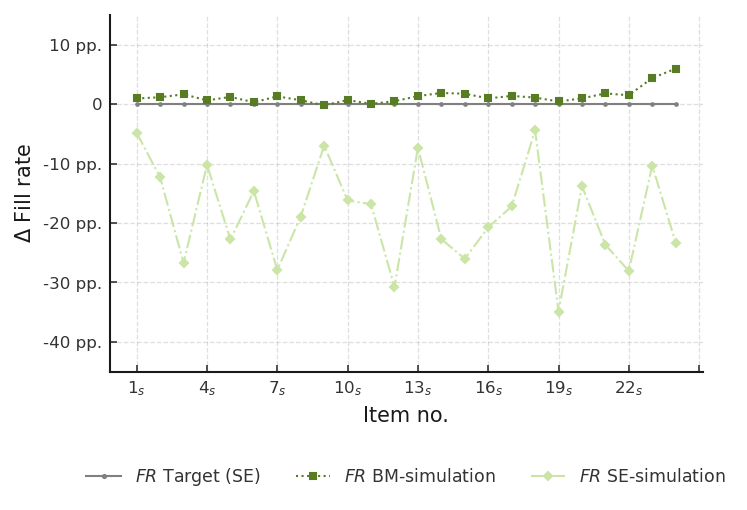

Average dealer SE undershoot: -0.18392884904117804
Average dealer BM undershoot: 0.013504415121877868


In [6]:
# Mean IFR deviation per item for combined policy stocked items.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_combined, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_combined:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            if target != 0:
                IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
                IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
                IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
                IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target

                IFR_count += 1
        except KeyError:
            #print(f"error: id {item_id}, dealer {dealer}")
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


yticks = [-0.4,-0.3,-0.2,-0.1,0,0.1]
yticklabs = ["-40 pp.","-30 pp.","-20 pp.","-10 pp.", "0", "10 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.45,0.15))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean combined policy per item.")
plt.savefig(f"{graph_dir}/to_pres_dealer_mean_IFR_deviation_per_item_combined_stocked_items.png",bbox_inches = 'tight')
plt.show()
print(f"Average dealer SE undershoot: {np.mean(y_mean_IFR_dev_SE_sim)}")
print(f"Average dealer BM undershoot: {np.mean(y_mean_IFR_dev_BM_sim)}")

#### Non-stocked

Dealer IFR mean combined policy per item.


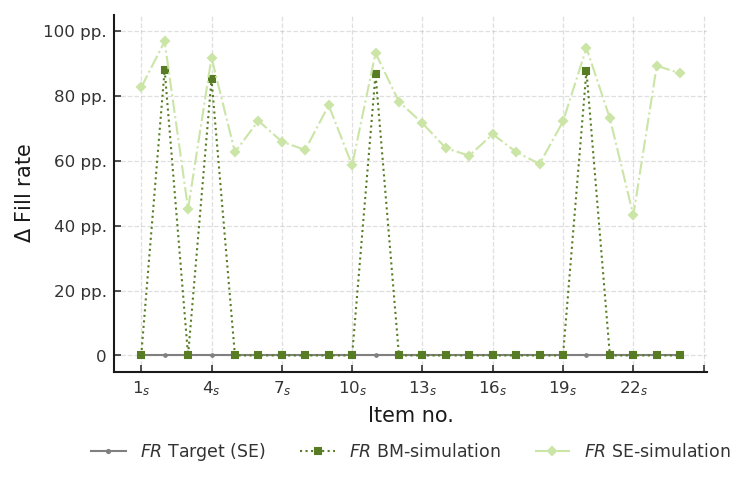

Average dealer SE undershoot: 0.7229022862432073
Average dealer BM undershoot: 0.14497942373723363


In [5]:
# Mean IFR deviation per item for combined policy non-stocked items.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_combined, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_combined:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            if target == 0:
                IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
                IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
                IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
                IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target

                IFR_count += 1
        except KeyError:
            #print(f"error: id {item_id}, dealer {dealer}")
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])


yticks = [0,0.2,0.4,0.6,0.8,1]
yticklabs = ["0","20 pp.", "40 pp.", "60 pp.", "80 pp.", "100 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.05,1.05))


ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean combined policy per item.")
plt.savefig(f"{graph_dir}/pres_1_dealer_mean_IFR_deviation_per_item_combined_non_stocked_items.png",bbox_inches = 'tight')
plt.show()
print(f"Average dealer SE undershoot: {np.mean(y_mean_IFR_dev_SE_sim)}")
print(f"Average dealer BM undershoot: {np.mean(y_mean_IFR_dev_BM_sim)}")

### Regular policy

Dealer IFR mean regular policy per dealer.


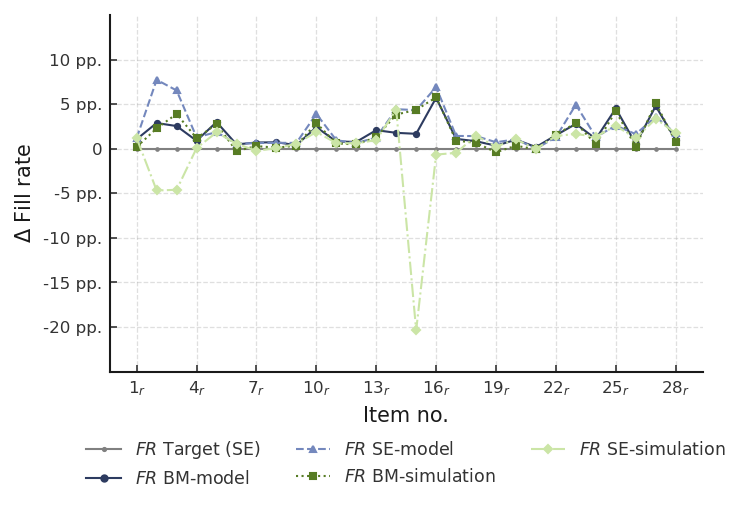

Average dealer SE undershoot: -0.0008269165053657087
Average dealer BM undershoot: 0.016685532204562006


In [62]:
# Mean IFR deviation per item for regular policy.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_regular, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_regular:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
            IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
            IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
            IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

yticks = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1]
yticklabs = ["-20 pp.","-15 pp.","-10 pp.","-5 pp.", "0", "5 pp.", "10 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.25,0.15))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/14_dealer_mean_IFR_deviation_per_item_regular.png",bbox_inches = 'tight')
plt.show()
print(f"Average dealer SE undershoot: {np.mean(y_mean_IFR_dev_SE_sim)}")
print(f"Average dealer BM undershoot: {np.mean(y_mean_IFR_dev_BM_sim)}")

Dealer IFR mean regular policy per dealer.


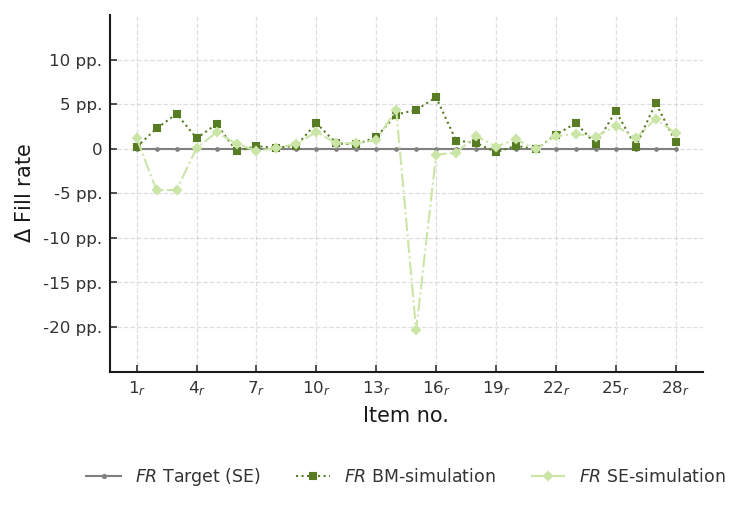

Average dealer SE undershoot: -0.0008269165053657087
Average dealer BM undershoot: 0.016685532204562006


In [7]:
# Mean IFR deviation per item for regular policy.
dealer_list = all_dealers

df = pd.DataFrame({"ID": ids_regular, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("ID", inplace = True)

for item_id in ids_regular:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for dealer in dealer_list:
        try:
            target = float(df_dict[item_id].loc[dealer,"Target fill rate"])
            IFR_dev_BM_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM model"]) - target
            IFR_dev_SE_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE model"]) - target
            IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, BM simulation"]) - target
            IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[dealer,"Fill rate estimate, SE simulation"]) - target
            
            IFR_count += 1
        except KeyError:
            pass
            
    if IFR_count > 0:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[item_id,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[item_id,"IFR_dev_mean_dealer_SE_sim"] = np.nan

df.reset_index(inplace = True)
x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
#ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
#ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

yticks = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1]
yticklabs = ["-20 pp.","-15 pp.","-10 pp.","-5 pp.", "0", "5 pp.", "10 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.25,0.15))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/to_pres_2_dealer_mean_IFR_deviation_per_item_regular.png",bbox_inches = 'tight')
plt.show()
print(f"Average dealer SE undershoot: {np.mean(y_mean_IFR_dev_SE_sim)}")
print(f"Average dealer BM undershoot: {np.mean(y_mean_IFR_dev_BM_sim)}")

###Mean fillrate by demand type per item

Dealer IFR mean regular policy per dealer.


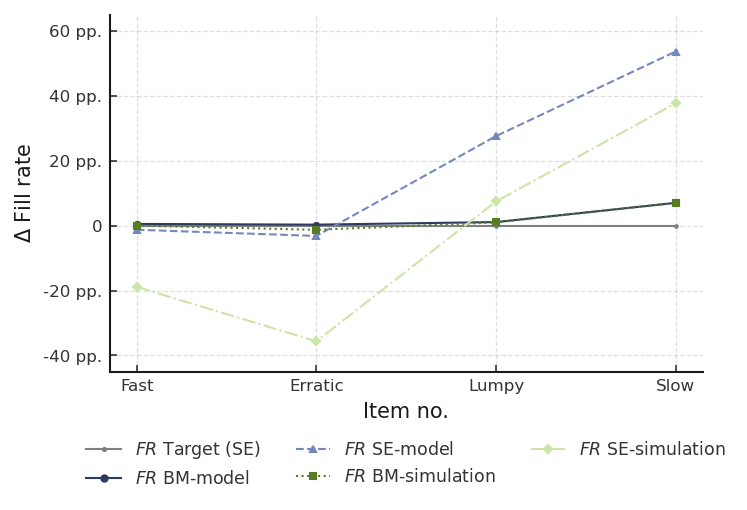

In [32]:
# Mean IFR deviation per demand type for combined policy.
dealer_list = all_dealers
demand_types = ['Fast','Erratic','Lumpy','Slow']

df = pd.DataFrame({"Demand type": demand_types, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("Demand type", inplace = True)

for demand_type in demand_types:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for item_id in ids_combined:
        for dealer in dealer_list:
            try:
                target = float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Target fill rate"])
                IFR_dev_BM_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, BM model"]) - target
                IFR_dev_SE_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, SE model"]) - target
                IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, BM simulation"]) - target
                IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, SE simulation"]) - target

                IFR_count += 1
            except KeyError:
                pass
            
    if IFR_count > 0:
        df.loc[demand_type,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[demand_type,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_SE_sim"] = np.nan

x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

yticks = [-0.4,-0.2,0,0.2,0.4,0.6]
yticklabs = ["-40 pp.","-20 pp.","0", "20 pp.","40 pp.", "60 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.45,0.65))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")


print(f"Dealer IFR mean regular policy per dealer.")
plt.savefig(f"{graph_dir}/15_dealer_mean_IFR_deviation_per_demand_type_combined.png",bbox_inches = 'tight')
plt.show()

Dealer IFR mean regular policy per demand type.


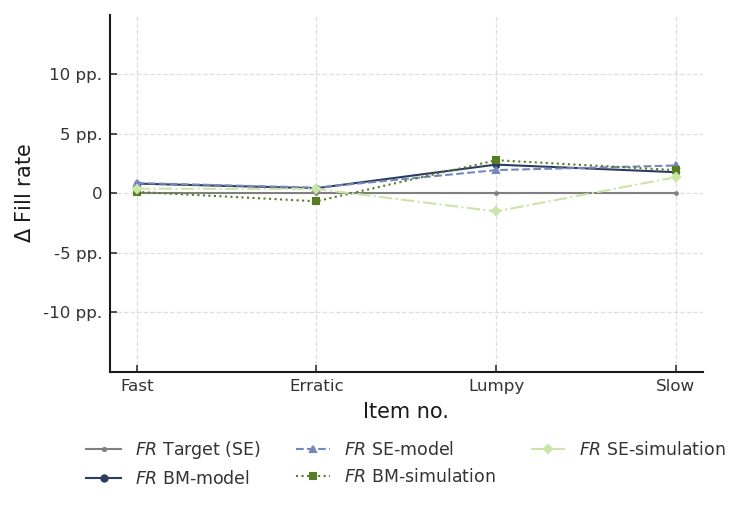

In [33]:
# Mean IFR deviation per demand type for regular policy.
dealer_list = all_dealers
demand_types = ['Fast','Erratic','Lumpy','Slow']

df = pd.DataFrame({"Demand type": demand_types, "IFR_dev_mean_dealer_BM": np.nan,
"IFR_dev_mean_dealer_SE": np.nan, "IFR_dev_mean_dealer_BM_sim": np.nan,
"IFR_dev_mean_dealer_SE_sim": np.nan})

df.set_index("Demand type", inplace = True)

for demand_type in demand_types:
    IFR_dev_BM_sum = 0
    IFR_dev_SE_sum = 0
    IFR_dev_BM_sim_sum = 0
    IFR_dev_SE_sim_sum = 0
    IFR_count = 0
    
    for item_id in ids_regular:
        for dealer in dealer_list:
            try:
                target = float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Target fill rate"])
                IFR_dev_BM_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, BM model"]) - target
                IFR_dev_SE_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, SE model"]) - target
                IFR_dev_BM_sim_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, BM simulation"]) - target
                IFR_dev_SE_sim_sum += float(df_dict[item_id].loc[df_dict[item_id]["Demand type"] == demand_type].loc[dealer,"Fill rate estimate, SE simulation"]) - target

                IFR_count += 1
            except KeyError:
                pass
            
    if IFR_count > 0:
        df.loc[demand_type,"IFR_dev_mean_dealer_BM"] = IFR_dev_BM_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_SE"] = IFR_dev_SE_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_BM_sim"] = IFR_dev_BM_sim_sum/IFR_count
        df.loc[demand_type,"IFR_dev_mean_dealer_SE_sim"] = IFR_dev_SE_sim_sum/IFR_count
    else:
        df.loc[demand_type,"IFR_dev_mean_dealer_BM"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_SE"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_BM_sim"] = np.nan
        df.loc[demand_type,"IFR_dev_mean_dealer_SE_sim"] = np.nan

x = df.index.values
y_mean_IFR_dev_BM = df["IFR_dev_mean_dealer_BM"].values
y_mean_IFR_dev_SE = df["IFR_dev_mean_dealer_SE"].values
y_mean_IFR_dev_BM_sim = df["IFR_dev_mean_dealer_BM_sim"].values
y_mean_IFR_dev_SE_sim = df["IFR_dev_mean_dealer_SE_sim"].values
#y_mean_IFR_target = df["target_IFR"].values


plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.plot(x, np.zeros_like(x), label = "$FR$ Target (SE)", color = color_dict["Target"], marker = marker_dict["Target"], linestyle = linestyle_dict["Target"])
ax.plot(x, y_mean_IFR_dev_BM, label = "$FR$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_mean_IFR_dev_SE, label = "$FR$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.plot(x, y_mean_IFR_dev_BM_sim, label = "${FR}$ BM-simulation", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.plot(x, y_mean_IFR_dev_SE_sim, label = "${FR}$ SE-simulation", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

yticks = [-0.1,-0.05,0,0.05,0.1]
yticklabs = ["-10 pp.","-5 pp.","0", "5 pp.","10 pp."]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabs)
ax.set_ylim((-0.15,0.15))

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 3)
ax.set_ylabel("$\Delta$ Fill rate")
ax.set_xlabel("Item no.")

print(f"Dealer IFR mean regular policy per demand type.")
plt.savefig(f"{graph_dir}/16_dealer_mean_IFR_deviation_per_demand_type_regular.png",bbox_inches = 'tight')
plt.show()

# Mean stock on hand per item

Soh per item, combined policy


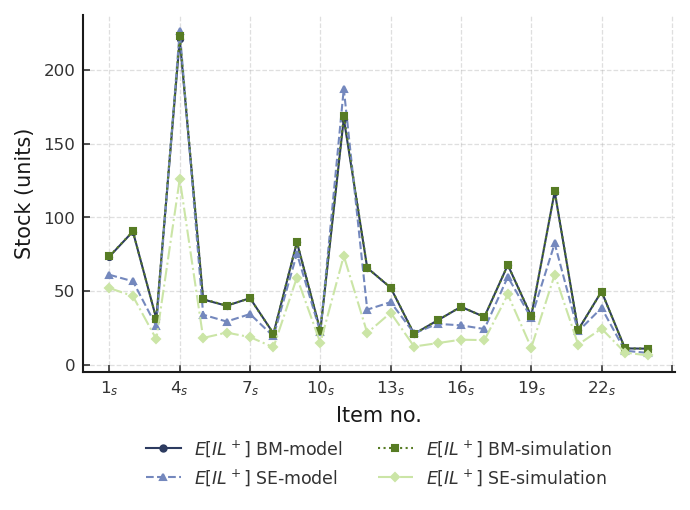

Stock special SE 31.58268200428454
Stock special BM 58.49925034521895


In [34]:
# Stock on hand per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System stock on hand] BM model"].values
y_SE = df["E[System stock on hand] SE model"].values
y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_BM, label = "$E[IL^+]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^+]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^+]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")


print("Soh per item, combined policy")
plt.savefig(f"{graph_dir}/17_SoH_per_item_combined.png",bbox_inches = 'tight')
plt.show()
print(f"Stock special SE {np.mean(y_SE_sim)}")
print(f"Stock special BM {np.mean(y_BM_sim)}")

Soh per item, regular policy


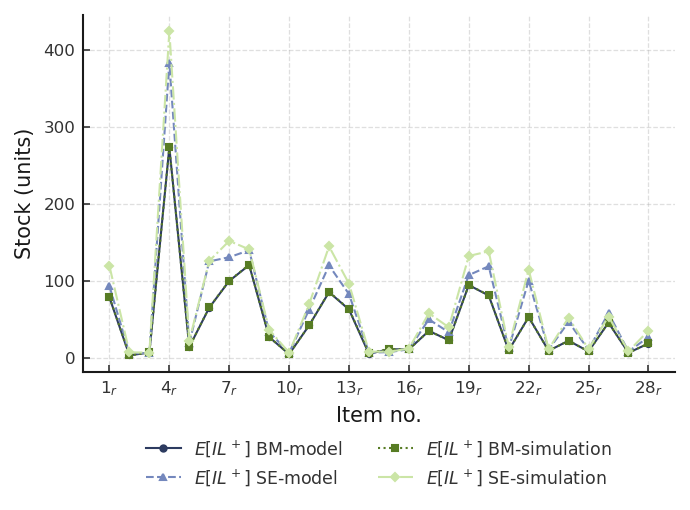

Stock regular SE 73.06464380523582
Stock regular BM 47.050778874758215


In [63]:
# Stock on hand per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System stock on hand] BM model"].values
y_SE = df["E[System stock on hand] SE model"].values
y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_BM, label = "$E[IL^+]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$E[IL^+]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$E[IL^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$E[IL^+]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")

print("Soh per item, regular policy")
plt.savefig(f"{graph_dir}/18_SoH_per_item_regular.png",bbox_inches = 'tight')
plt.show()
print(f"Stock regular SE {np.mean(y_SE_sim)}")
print(f"Stock regular BM {np.mean(y_BM_sim)}")

## Stock change

### Combined

SoH per item, combined policy


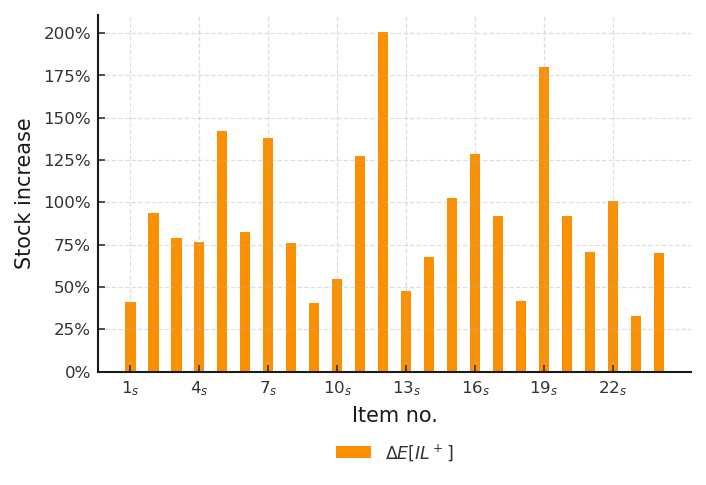

Stock increase 0.9085317866784403


In [36]:
# SoH per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

x = df.index.values
y_sim_absolute =   df["E[System stock on hand] BM simulation"].values - df["E[System stock on hand] SE simulation"].values
y_sim_percentage = np.divide(y_sim_absolute,df["E[System stock on hand] SE simulation"].values)

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
w = 0.45

ax.bar(x, y_sim_percentage, width = w, label = "$\Delta E[IL^+]$", color = color_dict_stock["SE_model_Deal"])

x = [f'${no}_s$' for no in [1,4,7,10,13,16,19,22]]
ax.set_xticks([0,3,6,9,12,15,18,21])
ax.set_xticklabels(x)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Stock increase")
ax.set_xlabel("Item no.")

print("SoH per item, combined policy")
plt.savefig(f"{graph_dir}/29_stock_increase_combined.png", bbox_inches = 'tight')
plt.show()
print(f"Stock increase {np.mean(y_sim_percentage)}")



### Regular

SoH per item, regular policy


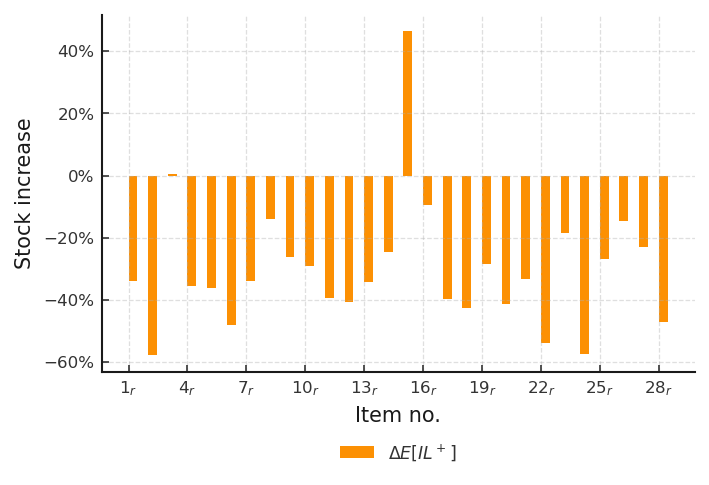

Stock increase -0.3016608660402336


In [65]:
# SoH per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

y_BM_sim = df["E[System stock on hand] BM simulation"].values
y_SE_sim = df["E[System stock on hand] SE simulation"].values

x = df.index.values
y_sim_absolute =   df["E[System stock on hand] BM simulation"].values - df["E[System stock on hand] SE simulation"].values
y_sim_percentage = np.divide(y_sim_absolute,df["E[System stock on hand] SE simulation"].values)

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
w = 0.45
ax.bar(x+w/2, y_sim_percentage, width = w, label = "$\Delta E[IL^+]$", color = color_dict_stock["SE_model_Deal"])

x = [f'${no+1}_r$' for no in [0,3,6,9,12,15,18,21,24,27]]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])
ax.set_xticklabels(x)


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_ylabel("Stock increase")
ax.set_xlabel("Item no.")

print("SoH per item, regular policy")
plt.savefig(f"{graph_dir}/30_stock_increase_regular.png", bbox_inches = 'tight')
plt.show()
print(f"Stock increase {np.mean(y_sim_percentage)}")

# Expected backorders

Backorders per item at dealers, combined policy


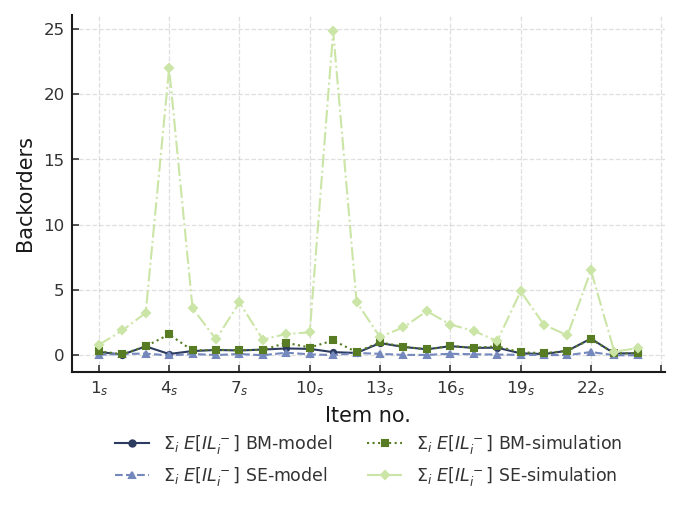

Backorders per item at RDC, combined policy


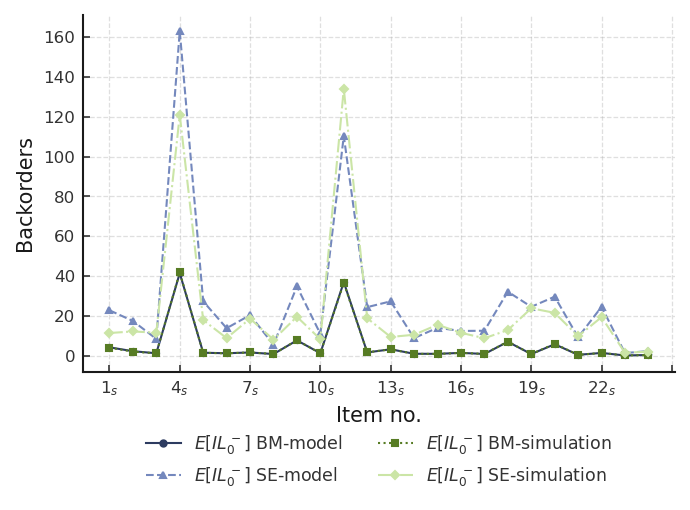

In [38]:
# backorders per item combined
df = results_df.loc[ids_combined]

df["Backorders at RDC, BM model"] = np.nan
df["Backorders at RDC, BM simulation"] = np.nan
df["Backorders at RDC, SE model"] = np.nan
df["Backorders at RDC, SE simulation"] = np.nan

for item_id in ids_combined:
    df.loc[item_id, "Backorders at RDC, BM model"] = df_dict[item_id].loc["Johannesburg","Backorders, BM model"]
    df.loc[item_id, "Backorders at RDC, BM simulation"] = df_dict[item_id].loc["Johannesburg","Backorders, BM simulation"]
    df.loc[item_id, "Backorders at RDC, SE model"] = df_dict[item_id].loc["Johannesburg","Backorders, SE model"]
    df.loc[item_id, "Backorders at RDC, SE simulation"] = df_dict[item_id].loc["Johannesburg","Backorders, SE simulation"]

df.reset_index(inplace = True, drop = True)
x = df.index.values
y_BM = df["E[System backorders] BM model"].values - df["Backorders at RDC, BM model"].values
y_SE = df["E[System backorders] SE model"].values - df["Backorders at RDC, SE model"].values
y_BM_sim = df["E[System backorders] BM simulation"].values - df["Backorders at RDC, BM simulation"].values
y_SE_sim = df["E[System backorders] SE simulation"].values - df["Backorders at RDC, SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_BM, label = "$\Sigma_i \ E[IL_i^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$\Sigma_i \ E[IL_i^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$\Sigma_i \ E[IL_i^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$\Sigma_i \ E[IL_i^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Backorders")
ax.set_xlabel("Item no.")

print("Backorders per item at dealers, combined policy")
plt.savefig(f"{graph_dir}/19_backorders_at_dealer_per_item_combined.png",bbox_inches = 'tight')
plt.show()

# At warehouse:
plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, df["Backorders at RDC, BM model"].values, label = "$E[IL_0^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, df["Backorders at RDC, SE model"].values, label = "$E[IL_0^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, df["Backorders at RDC, BM simulation"].values, label = "$E[IL_0^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, df["Backorders at RDC, SE simulation"].values, label = "$E[IL_0^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Backorders")
ax.set_xlabel("Item no.")

print("Backorders per item at RDC, combined policy")
plt.savefig(f"{graph_dir}/27_backorders_at_RDC_per_item_combined.png",bbox_inches = 'tight')
plt.show()





Backorders per item, regular policy


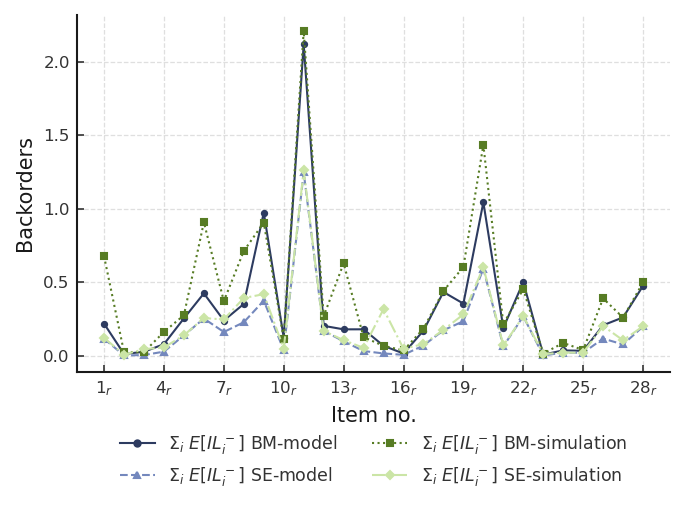

Backorders per item at RDC, regular policy


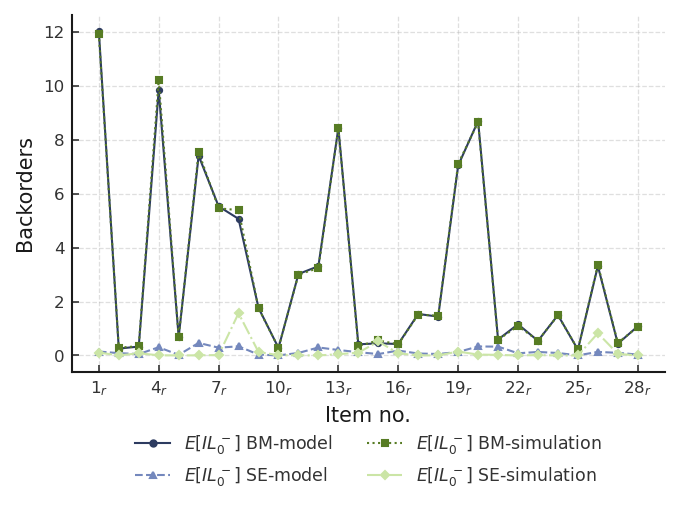

In [79]:
# backorders per item regular
df = results_df.loc[ids_regular]
df["Backorders at RDC, BM model"] = np.nan
df["Backorders at RDC, BM simulation"] = np.nan
df["Backorders at RDC, SE model"] = np.nan
df["Backorders at RDC, SE simulation"] = np.nan

for item_id in ids_regular:
    df.loc[item_id, "Backorders at RDC, BM model"] = df_dict[item_id].loc["Johannesburg","Backorders, BM model"]
    df.loc[item_id, "Backorders at RDC, BM simulation"] = df_dict[item_id].loc["Johannesburg","Backorders, BM simulation"]
    df.loc[item_id, "Backorders at RDC, SE model"] = df_dict[item_id].loc["Johannesburg","Backorders, SE model"]
    df.loc[item_id, "Backorders at RDC, SE simulation"] = df_dict[item_id].loc["Johannesburg","Backorders, SE simulation"]

df.reset_index(inplace = True, drop = True)
x = df.index.values
y_BM = df["E[System backorders] BM model"].values - df["Backorders at RDC, BM model"].values
y_SE = df["E[System backorders] SE model"].values - df["Backorders at RDC, SE model"].values
y_BM_sim = df["E[System backorders] BM simulation"].values - df["Backorders at RDC, BM simulation"].values
y_SE_sim = df["E[System backorders] SE simulation"].values - df["Backorders at RDC, SE simulation"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, y_BM, label = "$\Sigma_i \ E[IL_i^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$\Sigma_i \ E[IL_i^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$\Sigma_i \ E[IL_i^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$\Sigma_i \ E[IL_i^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])


ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Backorders")
ax.set_xlabel("Item no.")

print("Backorders per item, regular policy")
plt.savefig(f"{graph_dir}/20_backorders_at_dealer_per_item_regular.png", bbox_inches = 'tight')
plt.show()


# At warehouse:
plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

ax.set_xticks([0,3,6,9,12,15,18,21,24,27])

ax.plot(x, df["Backorders at RDC, BM model"].values, label = "$E[IL_0^-]$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, df["Backorders at RDC, SE model"].values, label = "$E[IL_0^-]$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, df["Backorders at RDC, BM simulation"].values, label = "$E[IL_0^-]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, df["Backorders at RDC, SE simulation"].values, label = "$E[IL_0^-]$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Backorders")
ax.set_xlabel("Item no.")

print("Backorders per item at RDC, regular policy")
plt.savefig(f"{graph_dir}/28_backorders_at_RDC_per_item_regular.png", bbox_inches = 'tight')
plt.show()

## Stock on hand at dealers vs warehouse per item


Soh per item, combined policy


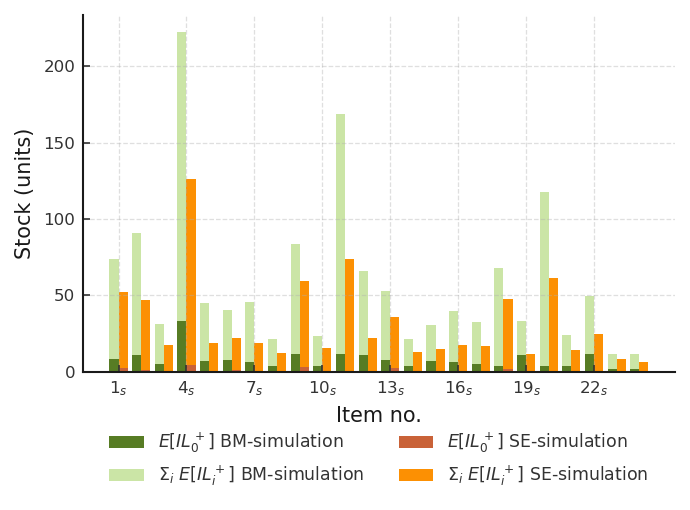

In [40]:
# Stock on hand per item combined BM simulation
df = pd.DataFrame({"Item": ids_combined, "E[RDC stock on hand] BM simulation": np.nan, 
"E[RDC stock on hand] SE simulation": np.nan, "E[Dealers stock on hand] BM simulation": np.nan,
"E[Dealers stock on hand] SE simulation": np.nan})
df.set_index("Item",inplace = True)

for item_id in ids_combined:
    # Warehouse
    RDC_BM = df_dict[item_id].loc["Johannesburg","SoH, BM simulation"]
    RDC_SE = df_dict[item_id].loc["Johannesburg","SoH, SE simulation"]
    df.loc[item_id,"E[RDC stock on hand] BM simulation"] = RDC_BM
    df.loc[item_id,"E[RDC stock on hand] SE simulation"] = RDC_SE

    df.loc[item_id,"E[Dealers stock on hand] BM simulation"] = df_dict[item_id]["SoH, BM simulation"].sum()-RDC_BM
    df.loc[item_id,"E[Dealers stock on hand] SE simulation"] = df_dict[item_id]["SoH, SE simulation"].sum()-RDC_SE
    
df.reset_index(inplace = True)
x = df.index.values
y_BM_RDC = df["E[RDC stock on hand] BM simulation"].values
y_SE_RDC = df["E[RDC stock on hand] SE simulation"].values
y_BM_Deal = df["E[Dealers stock on hand] BM simulation"].values
y_SE_Deal = df["E[Dealers stock on hand] SE simulation"].values 
w = 0.4 # width of bars

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.bar(x-0.5*w, y_BM_RDC, width = w, label = "$E[IL_0^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x-0.5*w, y_BM_Deal, bottom = y_BM_RDC, width = w,label = "$\Sigma_i \ E[IL_i^+]$ BM-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["BM_simulation"])

ax.bar(x+0.5*w, y_SE_RDC, width = w,label = "$E[IL_0^+]$ SE-simulation", color = color_dict_stock["SE_model_RDC"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x+0.5*w, y_SE_Deal, bottom = y_SE_RDC,width = w,label = "$\Sigma_i \ E[IL_i^+]$ SE-simulation", color = color_dict_stock["SE_model_Deal"], linestyle = linestyle_dict["BM_simulation"])

x = [f'${no}_s$' for no in [1,4,7,10,13,16,19,22]]
ax.set_xticks([0,3,6,9,12,15,18,21])
ax.set_xticklabels(x)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")


print("Soh per item, combined policy")
plt.savefig(f"{graph_dir}/21_SoH_dealer_vs_warehouse_combined.png", bbox_inches = 'tight')
plt.show()

Soh per item, combined policy


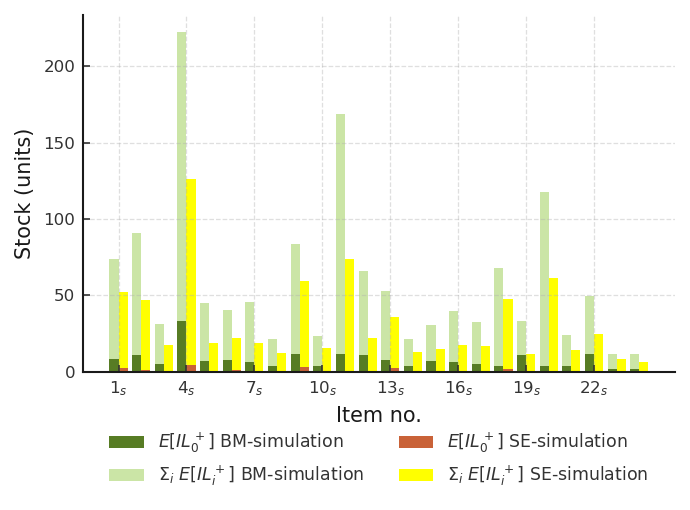

In [9]:
# Stock on hand per item combined BM simulation
df = pd.DataFrame({"Item": ids_combined, "E[RDC stock on hand] BM simulation": np.nan, 
"E[RDC stock on hand] SE simulation": np.nan, "E[Dealers stock on hand] BM simulation": np.nan,
"E[Dealers stock on hand] SE simulation": np.nan})
df.set_index("Item",inplace = True)

for item_id in ids_combined:
    # Warehouse
    RDC_BM = df_dict[item_id].loc["Johannesburg","SoH, BM simulation"]
    RDC_SE = df_dict[item_id].loc["Johannesburg","SoH, SE simulation"]
    df.loc[item_id,"E[RDC stock on hand] BM simulation"] = RDC_BM
    df.loc[item_id,"E[RDC stock on hand] SE simulation"] = RDC_SE

    df.loc[item_id,"E[Dealers stock on hand] BM simulation"] = df_dict[item_id]["SoH, BM simulation"].sum()-RDC_BM
    df.loc[item_id,"E[Dealers stock on hand] SE simulation"] = df_dict[item_id]["SoH, SE simulation"].sum()-RDC_SE
    
df.reset_index(inplace = True)
x = df.index.values
y_BM_RDC = df["E[RDC stock on hand] BM simulation"].values
y_SE_RDC = df["E[RDC stock on hand] SE simulation"].values
y_BM_Deal = df["E[Dealers stock on hand] BM simulation"].values
y_SE_Deal = df["E[Dealers stock on hand] SE simulation"].values 
w = 0.4 # width of bars

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.bar(x-0.5*w, y_BM_RDC, width = w, label = "$E[IL_0^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x-0.5*w, y_BM_Deal, bottom = y_BM_RDC, width = w,label = "$\Sigma_i \ E[IL_i^+]$ BM-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["BM_simulation"])

ax.bar(x+0.5*w, y_SE_RDC, width = w,label = "$E[IL_0^+]$ SE-simulation", color = color_dict_stock["SE_model_RDC"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x+0.5*w, y_SE_Deal, bottom = y_SE_RDC,width = w,label = "$\Sigma_i \ E[IL_i^+]$ SE-simulation", color = 'yellow', linestyle = linestyle_dict["BM_simulation"])

x = [f'${no}_s$' for no in [1,4,7,10,13,16,19,22]]
ax.set_xticks([0,3,6,9,12,15,18,21])
ax.set_xticklabels(x)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")


print("Soh per item, combined policy")
plt.savefig(f"{graph_dir}/to_pres_3_SoH_dealer_vs_warehouse_combined.png", bbox_inches = 'tight')
plt.show()

Soh per item, regular policy


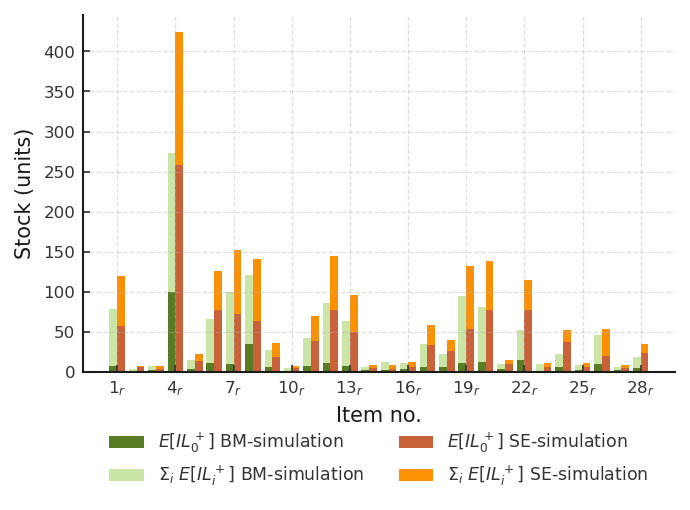

In [67]:
# Stock on hand per item regular 
df = pd.DataFrame({"Item": ids_regular, "E[RDC stock on hand] BM simulation": np.nan, 
"E[RDC stock on hand] SE simulation": np.nan, "E[Dealers stock on hand] BM simulation": np.nan,
"E[Dealers stock on hand] SE simulation": np.nan})
df.set_index("Item",inplace = True)

for item_id in ids_regular:
    # Warehouse
    RDC_BM = df_dict[item_id].loc["Johannesburg","SoH, BM simulation"]
    RDC_SE = df_dict[item_id].loc["Johannesburg","SoH, SE simulation"]
    df.loc[item_id,"E[RDC stock on hand] BM simulation"] = RDC_BM
    df.loc[item_id,"E[RDC stock on hand] SE simulation"] = RDC_SE

    df.loc[item_id,"E[Dealers stock on hand] BM simulation"] = df_dict[item_id]["SoH, BM simulation"].sum()-RDC_BM
    df.loc[item_id,"E[Dealers stock on hand] SE simulation"] = df_dict[item_id]["SoH, SE simulation"].sum()-RDC_SE
    
df.reset_index(inplace = True)
x = df.index.values
y_BM_RDC = df["E[RDC stock on hand] BM simulation"].values
y_SE_RDC = df["E[RDC stock on hand] SE simulation"].values
y_BM_Deal = df["E[Dealers stock on hand] BM simulation"].values
y_SE_Deal = df["E[Dealers stock on hand] SE simulation"].values 
w = 0.4 # width of bars

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.bar(x-0.5*w, y_BM_RDC, width = w, label = "$E[IL_0^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x-0.5*w, y_BM_Deal, bottom = y_BM_RDC, width = w,label = "$\Sigma_i \ E[IL_i^+]$ BM-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["BM_simulation"])

ax.bar(x+0.5*w, y_SE_RDC, width = w,label = "$E[IL_0^+]$ SE-simulation", color = color_dict_stock["SE_model_RDC"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x+0.5*w, y_SE_Deal, bottom = y_SE_RDC,width = w,label = "$\Sigma_i \ E[IL_i^+]$ SE-simulation", color = color_dict_stock["SE_model_Deal"], linestyle = linestyle_dict["BM_simulation"])

x = [f'${no+1}_r$' for no in [0,3,6,9,12,15,18,21,24,27]]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])
ax.set_xticklabels(x)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")

print("Soh per item, regular policy")
plt.savefig(f"{graph_dir}/22_SoH_dealer_vs_warehouse_regular.png", bbox_inches = 'tight')
plt.gray()
plt.show()

Soh per item, regular policy


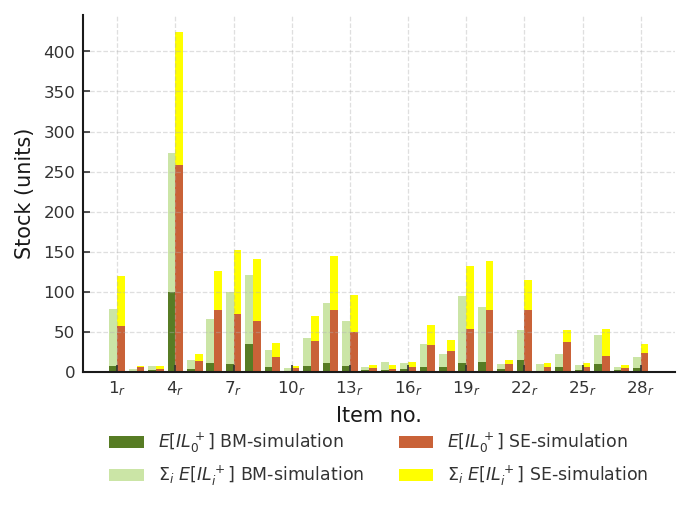

In [10]:
# Stock on hand per item regular 
df = pd.DataFrame({"Item": ids_regular, "E[RDC stock on hand] BM simulation": np.nan, 
"E[RDC stock on hand] SE simulation": np.nan, "E[Dealers stock on hand] BM simulation": np.nan,
"E[Dealers stock on hand] SE simulation": np.nan})
df.set_index("Item",inplace = True)

for item_id in ids_regular:
    # Warehouse
    RDC_BM = df_dict[item_id].loc["Johannesburg","SoH, BM simulation"]
    RDC_SE = df_dict[item_id].loc["Johannesburg","SoH, SE simulation"]
    df.loc[item_id,"E[RDC stock on hand] BM simulation"] = RDC_BM
    df.loc[item_id,"E[RDC stock on hand] SE simulation"] = RDC_SE

    df.loc[item_id,"E[Dealers stock on hand] BM simulation"] = df_dict[item_id]["SoH, BM simulation"].sum()-RDC_BM
    df.loc[item_id,"E[Dealers stock on hand] SE simulation"] = df_dict[item_id]["SoH, SE simulation"].sum()-RDC_SE
    
df.reset_index(inplace = True)
x = df.index.values
y_BM_RDC = df["E[RDC stock on hand] BM simulation"].values
y_SE_RDC = df["E[RDC stock on hand] SE simulation"].values
y_BM_Deal = df["E[Dealers stock on hand] BM simulation"].values
y_SE_Deal = df["E[Dealers stock on hand] SE simulation"].values 
w = 0.4 # width of bars

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.bar(x-0.5*w, y_BM_RDC, width = w, label = "$E[IL_0^+]$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x-0.5*w, y_BM_Deal, bottom = y_BM_RDC, width = w,label = "$\Sigma_i \ E[IL_i^+]$ BM-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["BM_simulation"])

ax.bar(x+0.5*w, y_SE_RDC, width = w,label = "$E[IL_0^+]$ SE-simulation", color = color_dict_stock["SE_model_RDC"], linestyle = linestyle_dict["BM_simulation"])
ax.bar(x+0.5*w, y_SE_Deal, bottom = y_SE_RDC,width = w,label = "$\Sigma_i \ E[IL_i^+]$ SE-simulation", color = 'yellow', linestyle = linestyle_dict["BM_simulation"])

x = [f'${no+1}_r$' for no in [0,3,6,9,12,15,18,21,24,27]]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])
ax.set_xticklabels(x)

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Stock (units)")
ax.set_xlabel("Item no.")

print("Soh per item, regular policy")
plt.savefig(f"{graph_dir}/to_pres_4_SoH_dealer_vs_warehouse_regular.png", bbox_inches = 'tight')
plt.gray()
plt.show()

# Costs

## Total costs per item


Cost per item, combined policy


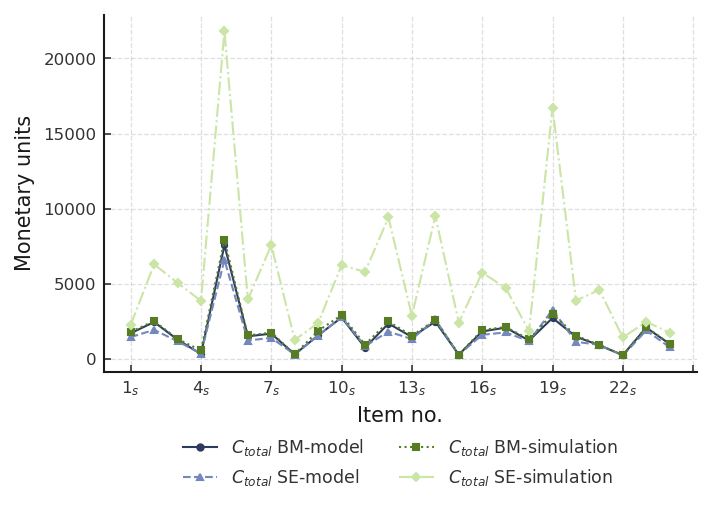

Cost special SE 5584.851152206771
Cost special BM 1862.9839611741963


In [71]:
# Costs per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System cost per time unit] BM model"].values *365
y_SE = df["E[System cost per time unit] SE model"].values *365
y_BM_sim = df["E[System cost per time unit] BM simulation"].values *365
y_SE_sim = df["E[System cost per time unit] SE simulation"].values *365

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_s$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])


ax.plot(x, y_BM, label = "$C_{total}$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$C_{total}$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$C_{total}$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$C_{total}$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Monetary units")
ax.set_xlabel("Item no.")

print("Cost per item, combined policy")
plt.savefig(f"{graph_dir}/23_cost_per_item_combined.png", bbox_inches = 'tight')
plt.show()
print(f"Cost special SE {np.mean(y_SE_sim)}")
print(f"Cost special BM {np.mean(y_BM_sim)}")

Cost per item, regular policy


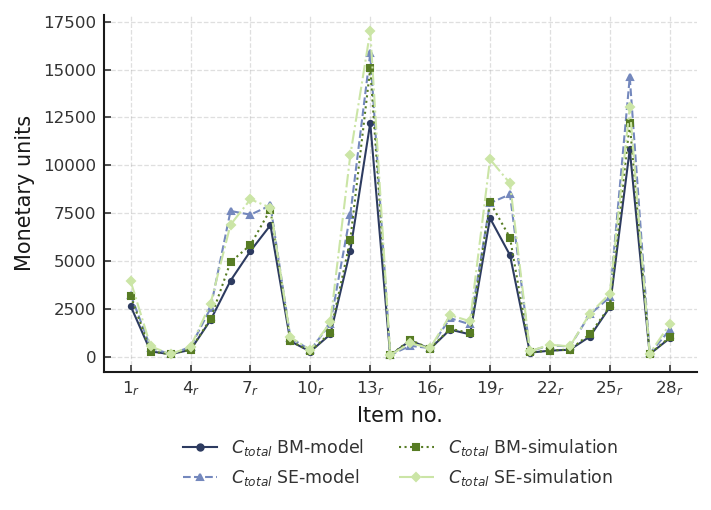

Cost regular SE 3850.2385794933903
Cost regular BM 3004.6728450336373


In [72]:
# Costs per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_BM = df["E[System cost per time unit] BM model"].values *365
y_SE = df["E[System cost per time unit] SE model"].values *365
y_BM_sim = df["E[System cost per time unit] BM simulation"].values *365
y_SE_sim = df["E[System cost per time unit] SE simulation"].values *365

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()

x = [f'${no+1}_r$' for no in x]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])


ax.plot(x, y_BM, label = "$C_{total}$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"], marker = marker_dict["BM_model"])
ax.plot(x, y_SE, label = "$C_{total}$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"], marker = marker_dict["SE_model"])
ax.plot(x, y_BM_sim, label = "$C_{total}$ BM-simulation", color = color_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"], marker = marker_dict["BM_simulation"])
ax.plot(x, y_SE_sim, label = "$C_{total}$ SE-simulation", color = color_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"], marker = marker_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.37),ncol = 2)
ax.set_ylabel("Monetary units")
ax.set_xlabel("Item no.")

print("Cost per item, regular policy")
plt.savefig(f"{graph_dir}/24_cost_per_item_regular.png", bbox_inches = 'tight')
plt.show()
print(f"Cost regular SE {np.mean(y_SE_sim)}")
print(f"Cost regular BM {np.mean(y_BM_sim)}")

## Cost reduction by implementation of BM model

Cost per item, combined policy


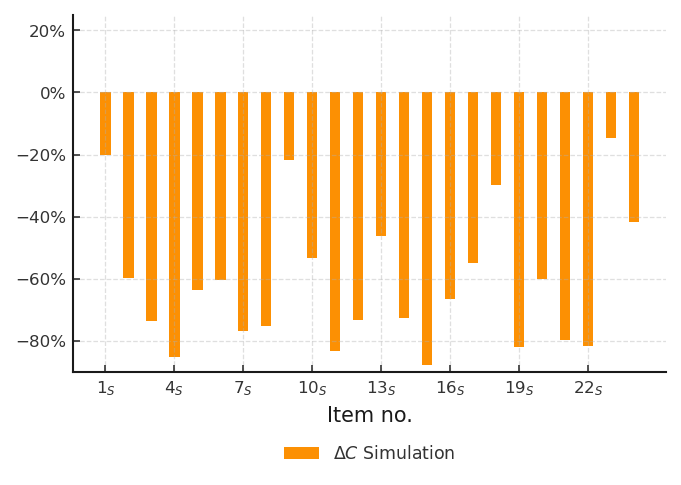

-0.6107428077020657

In [6]:
# Costs per item combined
df = results_df.loc[ids_combined]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_sim_absolute = df["E[System cost per time unit] BM simulation"].values - df["E[System cost per time unit] SE simulation"].values
y_sim_percentage = np.divide(y_sim_absolute,df["E[System cost per time unit] SE simulation"].values)

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
w = 0.45
ax.bar(x, y_sim_percentage, width = w, label = "$\Delta C$ Simulation", color = color_dict_stock["SE_model_Deal"])


x = [f'${no+1}_S$' for no in [0,3,6,9,12,15,18,21]]
ax.set_xticks([0,3,6,9,12,15,18,21])
ax.set_xticklabels(x)

ax.set_ylim((-0.9,0.25))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_xlabel("Item no.")

print("Cost per item, combined policy")
plt.savefig(f"{graph_dir}/25_cost_reduction_item_combined.png", bbox_inches = 'tight')
plt.show()

np.mean(y_sim_percentage)


Cost reduction, regular policy


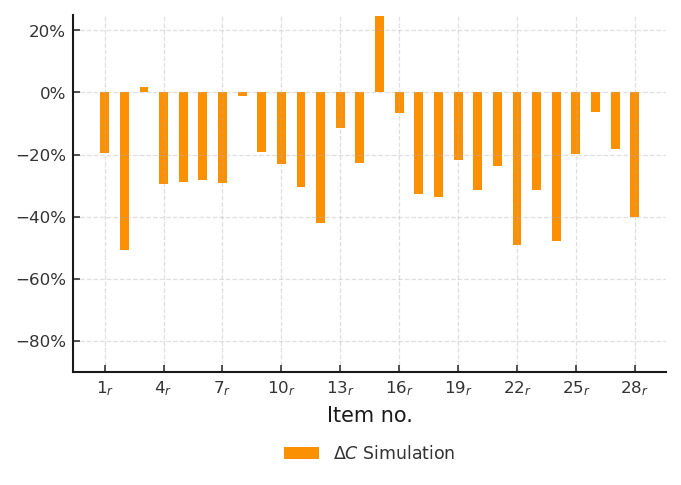

-0.24031608709025834

In [7]:
# Costs per item regular
df = results_df.loc[ids_regular]
df.reset_index(inplace = True, drop = True)

x = df.index.values
y_sim_absolute = df["E[System cost per time unit] BM simulation"].values - df["E[System cost per time unit] SE simulation"].values
y_sim_percentage = np.divide(y_sim_absolute,df["E[System cost per time unit] SE simulation"].values)

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
w = 0.45
ax.bar(x, y_sim_percentage, width = w, label = "$\Delta C$ Simulation", color = color_dict_stock["SE_model_Deal"])


x = [f'${no+1}_r$' for no in [0,3,6,9,12,15,18,21,24,27]]
ax.set_xticks([0,3,6,9,12,15,18,21,24,27])
ax.set_xticklabels(x)

ax.set_ylim((-0.9,0.25))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(bbox_to_anchor=(0.5,-0.3),ncol = 2)
ax.set_xlabel("Item no.")

print("Cost reduction, regular policy")
plt.savefig(f"{graph_dir}/26_cost_reduction_item_regular.png", bbox_inches = 'tight')
plt.show()
np.mean(y_sim_percentage)

In [74]:
#Average no of dealers per item_id
dealer_sum = 0
item_count = 0
for item_id in ids_combined:
    dealer_sum += ( len(df_dict[item_id].index)-1 )
    item_count += 1

print(f"Special items has {dealer_sum/item_count} dealers per item.")

dealer_sum = 0
item_count = 0
for item_id in ids_regular:
    dealer_sum += ( len(df_dict[item_id].index)-1 )
    item_count += 1

print(f"Regular items has {dealer_sum/item_count} dealers per item.")


Special items has 11.291666666666666 dealers per item.
Regular items has 7.107142857142857 dealers per item.


In [75]:
for demand_type in demand_types:
    count_special = 0
    for item_id in ids_combined:
        count_special += (df_dict[item_id].loc[df_dict[item_id]["Target fill rate"] == 0]["Demand type"] == demand_type).sum()
    
    print(f"Special policy, dtype: {demand_type}, Stock_type: non-stocked has {count_special} dealers.")

    count_special = 0
    for item_id in ids_combined:
        count_special += (df_dict[item_id].loc[df_dict[item_id]["Target fill rate"] != 0]["Demand type"] == demand_type).sum()
    
    print(f"Special policy, dtype: {demand_type}, Stock_type: stocked has {count_special} dealers.")

for demand_type in demand_types:
    count_regular = 0
    for item_id in ids_regular:
        count_regular += (df_dict[item_id].loc[df_dict[item_id]["Target fill rate"] == 0]["Demand type"] == demand_type).sum()

    print(f"Regular policy, dtype: {demand_type} Non-stocked has {count_regular} dealers.")

    count_regular = 0
    for item_id in ids_regular:
        count_regular += (df_dict[item_id].loc[df_dict[item_id]["Target fill rate"] != 0]["Demand type"] == demand_type).sum()

    print(f"Regular policy, dtype: {demand_type} Stocked has {count_regular} dealers.")



Special policy, dtype: Fast, Stock_type: non-stocked has 0 dealers.
Special policy, dtype: Fast, Stock_type: stocked has 104 dealers.
Special policy, dtype: Erratic, Stock_type: non-stocked has 0 dealers.
Special policy, dtype: Erratic, Stock_type: stocked has 33 dealers.
Special policy, dtype: Lumpy, Stock_type: non-stocked has 7 dealers.
Special policy, dtype: Lumpy, Stock_type: stocked has 9 dealers.
Special policy, dtype: Slow, Stock_type: non-stocked has 84 dealers.
Special policy, dtype: Slow, Stock_type: stocked has 58 dealers.
Regular policy, dtype: Fast Non-stocked has 1 dealers.
Regular policy, dtype: Fast Stocked has 91 dealers.
Regular policy, dtype: Erratic Non-stocked has 1 dealers.
Regular policy, dtype: Erratic Stocked has 35 dealers.
Regular policy, dtype: Lumpy Non-stocked has 5 dealers.
Regular policy, dtype: Lumpy Stocked has 18 dealers.
Regular policy, dtype: Slow Non-stocked has 44 dealers.
Regular policy, dtype: Slow Stocked has 32 dealers.


In [48]:
df_dict[item_id]

,Item: 14725906,Demand type,Target fill rate,Q,"R, BM model","Fill rate estimate, BM model","Fill rate estimate, BM simulation","R, SE model","Fill rate estimate, SE model","Fill rate estimate, SE simulation","SoH, BM model","SoH, BM simulation","SoH, SE model","SoH, SE simulation","Backorders, BM model","Backorders, BM simulation","Backorders, SE model","Backorders, SE simulation"
Installation name,,,,,,,,,,,,,,,,,,
Bartlett,Bartlett,Fast,0.995,4.0,1.0,0.997171,0.994069,1,0.999456,0.999871,3.345983,3.356589,3.434645,3.418841,0.000142,0.001062,-0.000021,0.000004
Bloemfontein,Bloemfontein,Slow,0.000,1.0,-1.0,0.000000,0.000000,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098315,0.098161,0.041667,0.041573
Capetown,Capetown,Slow,0.900,3.0,0.0,0.940434,0.944314,0,0.974750,0.974446,1.826587,1.838244,1.925206,1.937661,0.005324,0.009248,0.000956,0.001013
Durban,Durban,Fast,0.985,1.0,2.0,0.998452,0.993242,1,0.995838,0.996110,2.777975,2.788339,1.905999,1.904996,0.000089,0.001149,0.000133,0.000151
Kimberley,Kimberley,Slow,0.900,2.0,1.0,0.931038,0.928587,1,0.971233,0.972729,2.246772,2.241323,2.390474,2.386283,0.008960,0.018970,0.001591,0.001472
Middelburg,Middelburg,Fast,0.980,3.0,2.0,0.990828,0.976636,1,0.989915,0.990427,3.396165,3.430575,2.744347,2.750312,0.001473,0.013346,0.000881,0.000854
Port Elizabeth,Port Elizabeth,Slow,0.000,1.0,-1.0,0.000000,0.000000,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131074,0.127150,0.055550,0.055999
Rustenburg,Rustenburg,Slow,0.000,1.0,-1.0,0.000000,0.000000,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098315,0.098944,0.041667,0.041719
Steelpoort,Steelpoort,Slow,0.000,1.0,-1.0,0.000000,0.000000,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032759,0.032893,0.013883,0.014442


In [76]:
r_sum = 0
r_count = 0
for item_ids in zip(ids_combined,ids_regular):
    r_sum += df_dict[item_id].loc["Johannesburg","Fill rate estimate, BM simulation"]
    r_count +=1
r_sum/r_count

0.6786723638528431

In [50]:
ids_regular

array(['14711981', '11007069', '11037342', '14511327', '14639653',
       '14750657', '11110176', '14622355', '11034156', '11050176',
       '14519262', '11110023', '14688861', '11034514', '11062774',
       '14523932', '14669821', '15035179', '11110175', '14689735',
       '11035032', '11121121', '14530988', '14691909', '15072023',
       '14690316', '11035608', '14725906'], dtype=object)

In [51]:
14663703 11062774

SyntaxError: invalid syntax (838398047.py, line 1)